# Petz - Ecommerce - Google Analytics

In [159]:
#Imports
import pandas as pd
import json
import numpy as np
import seaborn as sns
from platform import python_version
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import pickle


In [160]:
# Versão da Linguagem Python

print('Versão Python Usada Neste Jupyter Notebook:', python_version())

Versão Python Usada Neste Jupyter Notebook: 3.9.12


In [161]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Grupo J - 1DTSO" --iversions

Author: Grupo J - 1DTSO

numpy  : 1.23.4
json   : 2.0.9
pandas : 1.5.0
seaborn: 0.11.2



In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [4]:
df.shape

(12283, 12)

In [5]:
# Visitas unicas é diferente de sessão (linha)
len(df.fullVisitorId.unique())

9996

In [6]:
df.dtypes

channelGrouping         object
date                     int64
device                  object
fullVisitorId           uint64
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

In [7]:
df = pd.read_csv('train.csv', dtype={'date':object, 'fullVisitorId':object,'visitId':object})

In [8]:
df.dtypes

channelGrouping         object
date                    object
device                  object
fullVisitorId           object
geoNetwork              object
sessionId               object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                 object
visitNumber              int64
visitStartTime           int64
dtype: object

In [9]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,1,1472804607
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,1,1472835928
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,1,1472856802
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,2,1472879649
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,1,1472829671


In [10]:
df.device.iloc[0]

'{"browser": "Chrome", "browserVersion": "not available in demo dataset", "browserSize": "not available in demo dataset", "operatingSystem": "Windows", "operatingSystemVersion": "not available in demo dataset", "isMobile": false, "mobileDeviceBranding": "not available in demo dataset", "mobileDeviceModel": "not available in demo dataset", "mobileInputSelector": "not available in demo dataset", "mobileDeviceInfo": "not available in demo dataset", "mobileDeviceMarketingName": "not available in demo dataset", "flashVersion": "not available in demo dataset", "language": "not available in demo dataset", "screenColors": "not available in demo dataset", "screenResolution": "not available in demo dataset", "deviceCategory": "desktop"}'

In [11]:
type(df.device.iloc[0])

str

In [12]:
json.loads(df.device.iloc[0])

{'browser': 'Chrome',
 'browserVersion': 'not available in demo dataset',
 'browserSize': 'not available in demo dataset',
 'operatingSystem': 'Windows',
 'operatingSystemVersion': 'not available in demo dataset',
 'isMobile': False,
 'mobileDeviceBranding': 'not available in demo dataset',
 'mobileDeviceModel': 'not available in demo dataset',
 'mobileInputSelector': 'not available in demo dataset',
 'mobileDeviceInfo': 'not available in demo dataset',
 'mobileDeviceMarketingName': 'not available in demo dataset',
 'flashVersion': 'not available in demo dataset',
 'language': 'not available in demo dataset',
 'screenColors': 'not available in demo dataset',
 'screenResolution': 'not available in demo dataset',
 'deviceCategory': 'desktop'}

In [13]:
# converter json para lista
[json.loads(linha) for linha in df.device]

[{'browser': 'Chrome',
  'browserVersion': 'not available in demo dataset',
  'browserSize': 'not available in demo dataset',
  'operatingSystem': 'Windows',
  'operatingSystemVersion': 'not available in demo dataset',
  'isMobile': False,
  'mobileDeviceBranding': 'not available in demo dataset',
  'mobileDeviceModel': 'not available in demo dataset',
  'mobileInputSelector': 'not available in demo dataset',
  'mobileDeviceInfo': 'not available in demo dataset',
  'mobileDeviceMarketingName': 'not available in demo dataset',
  'flashVersion': 'not available in demo dataset',
  'language': 'not available in demo dataset',
  'screenColors': 'not available in demo dataset',
  'screenResolution': 'not available in demo dataset',
  'deviceCategory': 'desktop'},
 {'browser': 'Chrome',
  'browserVersion': 'not available in demo dataset',
  'browserSize': 'not available in demo dataset',
  'operatingSystem': 'Macintosh',
  'operatingSystemVersion': 'not available in demo dataset',
  'isMobile

In [14]:
pd.DataFrame([json.loads(linha) for linha in df.device])

,browser,browserVersion,browserSize,operatingSystem,operatingSystemVersion,isMobile,mobileDeviceBranding,mobileDeviceModel,mobileInputSelector,mobileDeviceInfo,mobileDeviceMarketingName,flashVersion,language,screenColors,screenResolution,deviceCategory
0,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
1,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
2,Chrome,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
3,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
4,Safari,not available in demo dataset,not available in demo dataset,iOS,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Chrome,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12279,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile
12280,Chrome,not available in demo dataset,not available in demo dataset,Linux,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,desktop
12281,Chrome,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,mobile


### Dicionários para colunas

In [15]:
dicionarios = ['device', 'geoNetwork', 'trafficSource', 'totals']

In [16]:
for coluna in dicionarios:
    df = df.join(pd.DataFrame([json.loads(linha) for linha in df[coluna]]))

In [17]:
df.head()

,channelGrouping,date,device,fullVisitorId,geoNetwork,sessionId,socialEngagementType,totals,trafficSource,visitId,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9674781571160116268,"{""continent"": ""Asia"", ""subContinent"": ""Southea...",9674781571160116268_1472804607,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472804607,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",8590648239310839049,"{""continent"": ""Europe"", ""subContinent"": ""Easte...",8590648239310839049_1472835928,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472835928,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,"{""browser"": ""Chrome"", ""browserVersion"": ""not a...",9772828344252850532,"{""continent"": ""Americas"", ""subContinent"": ""Sou...",9772828344252850532_1472856802,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""Data Share Promo"", ""source"": ""Pa...",1472856802,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472879649,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""1"", ""pageviews"": ""1"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472879649,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,"{""browser"": ""Safari"", ""browserVersion"": ""not a...",1350700416054916432,"{""continent"": ""Americas"", ""subContinent"": ""Nor...",1350700416054916432_1472829671,Not Socially Engaged,"{""visits"": ""1"", ""hits"": ""5"", ""pageviews"": ""4"",...","{""campaign"": ""(not set)"", ""source"": ""google"", ...",1472829671,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN


In [18]:
df.dtypes

channelGrouping              object
date                         object
device                       object
fullVisitorId                object
geoNetwork                   object
sessionId                    object
socialEngagementType         object
totals                       object
trafficSource                object
visitId                      object
visitNumber                   int64
visitStartTime                int64
browser                      object
browserVersion               object
browserSize                  object
operatingSystem              object
operatingSystemVersion       object
isMobile                       bool
mobileDeviceBranding         object
mobileDeviceModel            object
mobileInputSelector          object
mobileDeviceInfo             object
mobileDeviceMarketingName    object
flashVersion                 object
language                     object
screenColors                 object
screenResolution             object
deviceCategory              

In [19]:
df.drop(dicionarios, axis=1, inplace=True)

In [20]:
df

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,browser,browserVersion,...,isTrueDirect,referralPath,adContent,campaignCode,visits,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,Not Socially Engaged,1472804607,1,1472804607,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,Not Socially Engaged,1472835928,1,1472835928,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,Not Socially Engaged,1472856802,1,1472856802,Chrome,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,Not Socially Engaged,1472879649,2,1472879649,Safari,not available in demo dataset,...,True,NaN,NaN,NaN,1,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,Not Socially Engaged,1472829671,1,1472829671,Safari,not available in demo dataset,...,NaN,NaN,NaN,NaN,1,5,4,NaN,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,Not Socially Engaged,1483540608,1,1483540608,Chrome,not available in demo dataset,...,NaN,/yt/about/pl/,NaN,NaN,1,1,1,1,1,NaN
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,Not Socially Engaged,1483580407,1,1483580407,Chrome,not available in demo dataset,...,NaN,/yt/about/,NaN,NaN,1,1,1,1,1,NaN
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,Not Socially Engaged,1483592122,1,1483592122,Chrome,not available in demo dataset,...,NaN,/yt/about/,NaN,NaN,1,1,1,1,1,NaN
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,Not Socially Engaged,1483601927,2,1483601927,Chrome,not available in demo dataset,...,True,/yt/about/lt/,NaN,NaN,1,2,2,NaN,NaN,NaN


In [21]:
df.drop('adwordsClickInfo', axis=1, inplace=True)

In [22]:
coluna_na = []

In [23]:
# Removendo colunas com valor unico (sem relevancia/omitidas pelo google ao publicar o dataset)
for coluna in df.columns:
    print(coluna +': '+str(len(df[coluna].unique())))
    if len(df[coluna].unique()) == 1:
        coluna_na.append(coluna)

channelGrouping: 8
date: 366
fullVisitorId: 9997
sessionId: 12276
socialEngagementType: 1
visitId: 12272
visitNumber: 50
visitStartTime: 12279
browser: 22
browserVersion: 1
browserSize: 1
operatingSystem: 12
operatingSystemVersion: 1
isMobile: 2
mobileDeviceBranding: 1
mobileDeviceModel: 1
mobileInputSelector: 1
mobileDeviceInfo: 1
mobileDeviceMarketingName: 1
flashVersion: 1
language: 1
screenColors: 1
screenResolution: 1
deviceCategory: 3
continent: 6
subContinent: 22
country: 145
region: 212
metro: 53
city: 296
cityId: 1
networkDomain: 1747
latitude: 1
longitude: 1
networkLocation: 1
campaign: 7
source: 76
medium: 7
keyword: 129
isTrueDirect: 2
referralPath: 198
adContent: 16
campaignCode: 2
visits: 1
hits: 96
pageviews: 75
bounces: 2
newVisits: 2
transactionRevenue: 147


In [24]:
coluna_na

['socialEngagementType',
 'browserVersion',
 'browserSize',
 'operatingSystemVersion',
 'mobileDeviceBranding',
 'mobileDeviceModel',
 'mobileInputSelector',
 'mobileDeviceInfo',
 'mobileDeviceMarketingName',
 'flashVersion',
 'language',
 'screenColors',
 'screenResolution',
 'cityId',
 'latitude',
 'longitude',
 'networkLocation',
 'visits']

In [25]:
df.drop(coluna_na, axis=1, inplace=True)

In [26]:
df.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1,1,NaN
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1,1,NaN
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1,NaN,NaN
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1,NaN


# Feature Engineering

### Conversão valores quantitativos

In [27]:
df.dtypes

channelGrouping       object
date                  object
fullVisitorId         object
sessionId             object
visitId               object
visitNumber            int64
visitStartTime         int64
browser               object
operatingSystem       object
isMobile                bool
deviceCategory        object
continent             object
subContinent          object
country               object
region                object
metro                 object
city                  object
networkDomain         object
campaign              object
source                object
medium                object
keyword               object
isTrueDirect          object
referralPath          object
adContent             object
campaignCode          object
hits                  object
pageviews             object
bounces               object
newVisits             object
transactionRevenue    object
dtype: object

In [28]:
# variáveis quantitavas
# Convertendo variáveis relevantes para o modelo
quant = ['bounces', 'hits', 'newVisits', 'pageviews','transactionRevenue' ]

In [29]:
#conversão valor numerico
for coluna in quant:
    df[coluna] = pd.to_numeric(df[coluna])

In [30]:
df.dtypes

channelGrouping        object
date                   object
fullVisitorId          object
sessionId              object
visitId                object
visitNumber             int64
visitStartTime          int64
browser                object
operatingSystem        object
isMobile                 bool
deviceCategory         object
continent              object
subContinent           object
country                object
region                 object
metro                  object
city                   object
networkDomain          object
campaign               object
source                 object
medium                 object
keyword                object
isTrueDirect           object
referralPath           object
adContent              object
campaignCode           object
hits                    int64
pageviews               int64
bounces               float64
newVisits             float64
transactionRevenue    float64
dtype: object

### Tratando a variável resposta

In [31]:
df.transactionRevenue.isna().sum()

12119

In [32]:
df.shape

(12283, 31)

In [33]:
# remover valores missing transactionRevenue
df.transactionRevenue.fillna(0, inplace=True)

In [34]:
df.transactionRevenue.value_counts()

0.0           12119
13590000.0        3
33590000.0        3
19190000.0        3
27190000.0        2
              ...  
24730000.0        1
6990000.0         1
14480000.0        1
95180000.0        1
25240000.0        1
Name: transactionRevenue, Length: 147, dtype: int64

In [35]:
df.transactionRevenue = df.transactionRevenue / 1000000

In [36]:
df.transactionRevenue.value_counts()

0.00     12119
13.59        3
33.59        3
19.19        3
27.19        2
         ...  
24.73        1
6.99         1
14.48        1
95.18        1
25.24        1
Name: transactionRevenue, Length: 147, dtype: int64

### Criando variáveis

In [37]:
len(set(df.fullVisitorId))

9997

In [38]:
df_quant = df.groupby('fullVisitorId', as_index=False)[quant].sum()

In [39]:
df_quant

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0
...,...,...,...,...,...,...
9992,9996691020299725061,0.0,10,0.0,10,0.0
9993,9996793353803109760,1.0,1,1.0,1,0.0
9994,9997125062030599880,0.0,8,1.0,8,0.0
9995,9997464307347866920,1.0,1,1.0,1,0.0


In [40]:
df_quant.shape

(9997, 6)

In [41]:
y = df_quant.transactionRevenue.copy()

In [42]:
X = df_quant.drop('transactionRevenue', axis=1)

### Treinando o modelo

In [44]:
# Split dados de d
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [45]:
X_train

,fullVisitorId,bounces,hits,newVisits,pageviews
9066,9160012321913348805,0.0,16,1.0,12
2603,3214687528122048939,1.0,1,1.0,1
8832,8936592721963873590,0.0,13,1.0,13
1579,2277422319005476191,1.0,1,1.0,1
9887,989458850703391704,1.0,1,1.0,1
...,...,...,...,...,...
5734,603006292181313614,0.0,2,1.0,2
5191,5561054446689415927,1.0,1,1.0,1
5390,5751745681132213262,0.0,33,1.0,22
860,1630406215672246503,1.0,1,1.0,1


In [46]:
y_train

9066    144.97
2603      0.00
8832      6.99
1579      0.00
9887      0.00
         ...  
5734      0.00
5191      0.00
5390      0.00
860       0.00
7270      0.00
Name: transactionRevenue, Length: 6997, dtype: float64

In [47]:
y_train.shape

(6997,)

In [49]:
# Instanciando modelo
reg = LinearRegression()

In [50]:
# Treinando o modelo
reg.fit(X_train, y_train)

LinearRegression()

In [51]:
# Testando o modelo
reg_predict = reg.predict(X_test)

In [52]:
reg_predict

array([1.55166047, 1.55520911, 1.68772647, ..., 1.61310964, 1.52678998,
       1.58119137])

In [53]:
X_test.head()

,fullVisitorId,bounces,hits,newVisits,pageviews
4122,4578458064892235105,1.0,1,1.0,1
4065,4521976094244865667,0.0,2,1.0,2
1731,2412763304338054923,1.0,1,1.0,1
4740,5154139143679150892,0.0,6,1.0,5
6391,6631771261952767652,0.0,7,1.0,7


In [54]:
resultado = pd.DataFrame()

In [55]:
resultado['revenue'] = y_test
resultado['predict'] = reg_predict
resultado['erro'] = reg_predict - y_test

In [56]:
resultado

,revenue,predict,erro
4122,0.0,1.551660,1.551660
4065,0.0,1.555209,1.555209
1731,0.0,1.687726,1.687726
4740,0.0,1.515492,1.515492
6391,0.0,1.422655,1.422655
...,...,...,...
5580,0.0,1.468371,1.468371
1074,0.0,1.723133,1.723133
3063,0.0,1.613110,1.613110
4554,0.0,1.526790,1.526790


In [57]:
resultado[resultado.revenue > 0]

,revenue,predict,erro
3006,32.49,1.616211,-30.873789
5928,74.85,1.449755,-73.400245
8361,424.50,1.306194,-423.193806
8612,55.99,1.291322,-54.698678
416,15.19,1.831725,-13.358275
4077,5.97,1.554336,-4.415664
8146,27.19,1.318915,-25.871085
4908,372.65,1.505642,-371.144358
9395,29.98,1.779852,-28.200148
8728,101.95,1.284318,-100.665682


## Análise dos resultados

### Análise dos resultados

#### MSE

In [61]:
mean_squared_error(y_test, reg_predict)

807.2459296820928

#### RMSE

In [62]:
np.sqrt(mean_squared_error(y_test, reg_predict))

28.412073660366516

In [63]:
np.mean(df_quant.transactionRevenue)

1.778953686105832

In [64]:
np.std(df_quant.transactionRevenue)

25.129905708017944

> erro médio é maior que o desvio padrão da coluna original

### Análise Gráfica dos resultados

C:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

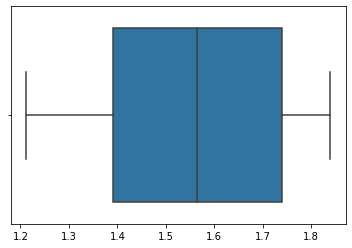

In [66]:
sns.boxplot(reg_predict)

C:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='transactionRevenue'>

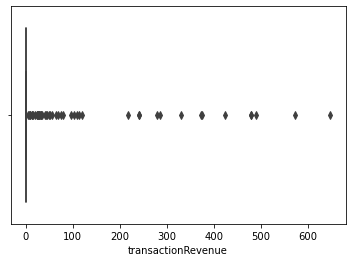

In [67]:
sns.boxplot(y_test)

C:\Users\henri\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='transactionRevenue', ylabel='Density'>

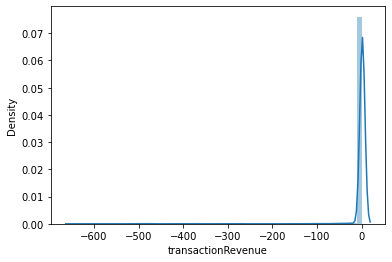

In [68]:
sns.distplot(reg_predict - y_test)

#### Valores para primeira visita

In [69]:
visitas_ultimas = df.groupby('fullVisitorId', as_index=False)

In [70]:
visitas_ultimas = visitas_ultimas['visitNumber'].max()

In [71]:
visitas_ultimas.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [72]:
usuarios_visitas_unicos = df.drop_duplicates(subset=['fullVisitorId', 'visitNumber'])

In [73]:
usuarios_visitas_unicos

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,Organic Search,20160902,9674781571160116268,9674781571160116268_1472804607,1472804607,1,1472804607,Chrome,Windows,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
1,Organic Search,20160902,8590648239310839049,8590648239310839049_1472835928,1472835928,1,1472835928,Chrome,Macintosh,False,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
2,Affiliates,20160902,9772828344252850532,9772828344252850532_1472856802,1472856802,1,1472856802,Chrome,Macintosh,False,...,NaN,NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0
3,Organic Search,20160902,1350700416054916432,1350700416054916432_1472879649,1472879649,2,1472879649,Safari,iOS,True,...,(not provided),True,NaN,NaN,NaN,1,1,1.0,NaN,0.0
4,Organic Search,20160902,1350700416054916432,1350700416054916432_1472829671,1472829671,1,1472829671,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,5,4,NaN,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12278,Social,20170104,7330357551242339916,7330357551242339916_1483540608,1483540608,1,1483540608,Chrome,Windows,False,...,NaN,NaN,/yt/about/pl/,NaN,NaN,1,1,1.0,1.0,0.0
12279,Social,20170104,696320405243257438,0696320405243257438_1483580407,1483580407,1,1483580407,Chrome,Android,True,...,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,0.0
12280,Social,20170104,5437703324867866371,5437703324867866371_1483592122,1483592122,1,1483592122,Chrome,Linux,False,...,NaN,NaN,/yt/about/,NaN,NaN,1,1,1.0,1.0,0.0
12281,Social,20170104,8869363093179043393,8869363093179043393_1483601927,1483601927,2,1483601927,Chrome,Android,True,...,NaN,True,/yt/about/lt/,NaN,NaN,2,2,NaN,NaN,0.0


In [74]:
usuarios_visitas_unicos.shape

(12270, 31)

In [75]:
type(visitas_ultimas)

pandas.core.frame.DataFrame

In [76]:
type(usuarios_visitas_unicos)

pandas.core.frame.DataFrame

In [77]:
visitas = pd.merge(visitas_ultimas, usuarios_visitas_unicos, 
                   left_on=['fullVisitorId','visitNumber'],
                   right_on=['fullVisitorId','visitNumber'],
                   how='left')

In [78]:
visitas

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9992,9996691020299725061,3,Referral,20161221,9996691020299725061_1482388264,1482388264,1482388264,Chrome,Macintosh,False,...,NaN,True,/,NaN,NaN,10,10,NaN,NaN,0.0
9993,9996793353803109760,1,Social,20161130,9996793353803109760_1480566609,1480566609,1480566609,Chrome,Android,True,...,NaN,NaN,/yt/about/th/,NaN,NaN,1,1,1.0,1.0,0.0
9994,9997125062030599880,1,Organic Search,20170112,9997125062030599880_1484217422,1484217422,1484217422,Safari,iOS,True,...,(not provided),NaN,NaN,NaN,NaN,8,8,NaN,1.0,0.0
9995,9997464307347866920,1,Organic Search,20170314,9997464307347866920_1489504370,1489504370,1489504370,Chrome,Android,True,...,(not provided),NaN,NaN,NaN,NaN,1,1,1.0,1.0,0.0


In [79]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [80]:
visitas.shape

(9997, 31)

In [81]:
visitas_primeira = df.groupby('fullVisitorId', as_index=False)

In [82]:
visitas_primeira = visitas_primeira['visitNumber'].min()

In [83]:
visitas_primeira.head()

,fullVisitorId,visitNumber
0,0002365800130207040,1
1,0010286039787739137,1
2,0011056874471185769,1
3,0014443856125569702,1
4,0017260116665815114,6


In [84]:
visitas_primeira.set_index('fullVisitorId', inplace=True)

In [85]:
visitas1 = visitas.join(visitas_primeira, how='left',on='fullVisitorId', rsuffix='_primeira')

In [86]:
visitas1.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue,visitNumber_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0,1
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0,1
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0,1
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0,1
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0,6


In [87]:
visitas1 = pd.merge(visitas1, usuarios_visitas_unicos, 
                   left_on=['fullVisitorId','visitNumber_primeira'],
                   right_on=['fullVisitorId','visitNumber'],
                   how='left', suffixes=['_ultima','_primeira'])

In [94]:
visitas1.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,sessionId_ultima,visitId_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,hits_primeira,pageviews_primeira,bounces_primeira,newVisits_primeira,transactionRevenue_primeira
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


#### Limpando a base de dados

In [95]:
quant

['bounces', 'hits', 'newVisits', 'pageviews', 'transactionRevenue']

In [97]:
for coluna in quant:
    visitas1.drop(coluna + '_ultima',axis=1,inplace=True)
    visitas1.drop(coluna + '_primeira',axis=1,inplace=True)

In [98]:
visitas.head()

,fullVisitorId,visitNumber,channelGrouping,date,sessionId,visitId,visitStartTime,browser,operatingSystem,isMobile,...,keyword,isTrueDirect,referralPath,adContent,campaignCode,hits,pageviews,bounces,newVisits,transactionRevenue
0,0002365800130207040,1,Social,20160904,0002365800130207040_1472974804,1472974804,1472974804,Edge,Windows,False,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1,1,1.0,1.0,0.0
1,0010286039787739137,1,Organic Search,20160928,0010286039787739137_1475084026,1475084026,1475084026,Chrome,Chrome OS,False,...,(not provided),NaN,NaN,NaN,NaN,4,3,NaN,1.0,0.0
2,0011056874471185769,1,Social,20161205,0011056874471185769_1480996024,1480996024,1480996024,Chrome,Windows,False,...,NaN,NaN,/yt/about/,NaN,NaN,2,2,NaN,1.0,0.0
3,0014443856125569702,1,Social,20161002,0014443856125569702_1475423502,1475423502,1475423502,Opera,Windows,False,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1,1,1.0,1.0,0.0
4,0017260116665815114,6,Direct,20170420,0017260116665815114_1492707286,1492707286,1492707286,Safari,Macintosh,False,...,NaN,True,NaN,NaN,NaN,2,2,NaN,NaN,0.0


In [99]:
ids = ['sessionId_ultima','visitId_ultima','sessionId_primeira', 'visitId_primeira']

In [102]:
visitas1.drop(ids,axis=1,inplace=True)

In [103]:
visitas1.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,city_primeira,networkDomain_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,not available in demo dataset,wildpark.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,Kansas City,(not set),(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,not available in demo dataset,pldt.net,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,Bucharest,rdsnet.ro,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,not available in demo dataset,comcastbusiness.net,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [104]:
visitas1.columns

Index(['fullVisitorId', 'visitNumber', 'channelGrouping', 'date', 'sessionId',
       'visitId', 'visitStartTime', 'browser', 'operatingSystem', 'isMobile',
       'deviceCategory', 'continent', 'subContinent', 'country', 'region',
       'metro', 'city', 'networkDomain', 'campaign', 'source', 'medium',
       'keyword', 'isTrueDirect', 'referralPath', 'adContent', 'campaignCode',
       'hits', 'pageviews', 'bounces', 'newVisits', 'transactionRevenue'],
      dtype='object')

In [105]:
visitas = visitas1

In [106]:
geo = ['city_primeira','continent_primeira','country_primeira','metro_primeira','region_primeira',
      'networkDomain_primeira','subContinent_primeira']

In [107]:
visitas.drop(geo,axis=1,inplace=True)

In [108]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


In [109]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isMobile_primeira,deviceCategory_primeira,campaign_primeira,source_primeira,medium_primeira,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ru/,NaN,NaN
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,False,desktop,(not set),google,organic,(not provided),NaN,NaN,NaN,NaN
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/,NaN,NaN
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,False,desktop,(not set),youtube.com,referral,NaN,NaN,/yt/about/ro/,NaN,NaN
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,False,desktop,(not set),(direct),(none),NaN,True,NaN,NaN,NaN


### Criando novas variáveis

In [110]:
df_quant.head()

,fullVisitorId,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1.0,1,1.0,1,0.0
1,0010286039787739137,0.0,4,1.0,3,0.0
2,0011056874471185769,0.0,2,1.0,2,0.0
3,0014443856125569702,1.0,1,1.0,1,0.0
4,0017260116665815114,0.0,2,0.0,2,0.0


In [111]:
visitas = pd.merge(visitas,df_quant,left_on=['fullVisitorId'],
                  right_on=['fullVisitorId'],how='left')

In [112]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,keyword_primeira,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,(not provided),NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0


In [113]:
# Diferenca, em dias, entre primeira e ultima visita
visitas['tempo_dif'] = visitas.visitStartTime_ultima - visitas.visitStartTime_primeira

In [114]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,isTrueDirect_primeira,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,NaN,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,NaN,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,NaN,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,True,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0


In [115]:
visits = df.groupby('fullVisitorId',as_index=False).count().visitNumber.values

In [116]:
visits

array([1, 1, 1, ..., 1, 1, 2], dtype=int64)

In [117]:
visitas['visits'] = visits

In [118]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,referralPath_primeira,adContent_primeira,campaignCode_primeira,bounces,hits,newVisits,pageviews,transactionRevenue,tempo_dif,visits
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,/yt/about/ru/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,NaN,NaN,NaN,0.0,4,1.0,3,0.0,0,1
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,/yt/about/,NaN,NaN,0.0,2,1.0,2,0.0,0,1
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,/yt/about/ro/,NaN,NaN,1.0,1,1.0,1,0.0,0,1
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,NaN,NaN,NaN,0.0,2,0.0,2,0.0,0,1


In [119]:
# Extração dimensões de tempo
visitas['ano_ultima'] = pd.to_numeric([data[0:4] for data in visitas.date_ultima])
visitas['mes_ultima'] = pd.to_numeric([data[4:6] for data in visitas.date_ultima])
visitas['dia_ultima'] = pd.to_numeric([data[6:8] for data in visitas.date_ultima])

visitas['ano_primeira'] = pd.to_numeric([data[0:4] for data in visitas.date_primeira])
visitas['mes_primeira'] = pd.to_numeric([data[4:6] for data in visitas.date_primeira])
visitas['dia_primeira'] = pd.to_numeric([data[6:8] for data in visitas.date_primeira])

In [120]:
visitas.head()

,fullVisitorId,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,...,pageviews,transactionRevenue,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,0002365800130207040,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,9,4,2016,9,4
1,0010286039787739137,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,...,3,0.0,0,1,2016,9,28,2016,9,28
2,0011056874471185769,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,...,2,0.0,0,1,2016,12,5,2016,12,5
3,0014443856125569702,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,...,1,0.0,0,1,2016,10,2,2016,10,2
4,0017260116665815114,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,...,2,0.0,0,1,2017,4,20,2017,4,20


In [121]:
visitas.dtypes

fullVisitorId                object
visitNumber_ultima            int64
channelGrouping_ultima       object
date_ultima                  object
visitStartTime_ultima         int64
browser_ultima               object
operatingSystem_ultima       object
isMobile_ultima                bool
deviceCategory_ultima        object
continent_ultima             object
subContinent_ultima          object
country_ultima               object
region_ultima                object
metro_ultima                 object
city_ultima                  object
networkDomain_ultima         object
campaign_ultima              object
source_ultima                object
medium_ultima                object
keyword_ultima               object
isTrueDirect_ultima          object
referralPath_ultima          object
adContent_ultima             object
campaignCode_ultima          object
visitNumber_primeira          int64
channelGrouping_primeira     object
date_primeira                object
visitNumber_primeira        

# Separando a base de dados

In [122]:
visitas.drop('fullVisitorId',axis=1,inplace=True)

In [123]:
y = visitas.transactionRevenue.copy()

In [124]:
X = visitas.drop('transactionRevenue',axis=1)

In [125]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,Social,20160904,1472974804,Edge,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,Organic Search,20160928,1475084026,Chrome,Chrome OS,False,desktop,Americas,Northern America,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,Social,20161205,1480996024,Chrome,Windows,False,desktop,Asia,Southeast Asia,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,Social,20161002,1475423502,Opera,Windows,False,desktop,Europe,Eastern Europe,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,Direct,20170420,1492707286,Safari,Macintosh,False,desktop,Americas,Northern America,...,0.0,2,0,1,2017,4,20,2017,4,20


In [126]:
quali = visitas.dtypes[visitas.dtypes == object].keys()

In [127]:
quali

Index(['channelGrouping_ultima', 'date_ultima', 'browser_ultima',
       'operatingSystem_ultima', 'deviceCategory_ultima', 'continent_ultima',
       'subContinent_ultima', 'country_ultima', 'region_ultima',
       'metro_ultima', 'city_ultima', 'networkDomain_ultima',
       'campaign_ultima', 'source_ultima', 'medium_ultima', 'keyword_ultima',
       'isTrueDirect_ultima', 'referralPath_ultima', 'adContent_ultima',
       'campaignCode_ultima', 'channelGrouping_primeira', 'date_primeira',
       'browser_primeira', 'operatingSystem_primeira',
       'deviceCategory_primeira', 'campaign_primeira', 'source_primeira',
       'medium_primeira', 'keyword_primeira', 'isTrueDirect_primeira',
       'referralPath_primeira', 'adContent_primeira', 'campaignCode_primeira'],
      dtype='object')

#### Label encoder

In [129]:
strings = list(X.operatingSystem_ultima.values.astype('str'))

In [130]:
lbl = LabelEncoder()

In [131]:
lbl.fit(strings)

LabelEncoder()

In [132]:
lbl.transform(strings)

array([ 9,  3,  9, ..., 11,  1,  9])

In [133]:
# label encoding para todas as colunas texto
for coluna in quali:
    lbl = LabelEncoder()
    strings = list(X[coluna].values.astype('str'))
    lbl.fit(strings)
    X[coluna] = lbl.transform(strings)

In [134]:
X.head()

,visitNumber_ultima,channelGrouping_ultima,date_ultima,visitStartTime_ultima,browser_ultima,operatingSystem_ultima,isMobile_ultima,deviceCategory_ultima,continent_ultima,subContinent_ultima,...,newVisits,pageviews,tempo_dif,visits,ano_ultima,mes_ultima,dia_ultima,ano_primeira,mes_primeira,dia_primeira
0,1,7,34,1472974804,7,9,False,0,4,7,...,1.0,1,0,1,2016,9,4,2016,9,4
1,1,4,58,1475084026,5,3,False,0,2,11,...,1.0,3,0,1,2016,9,28,2016,9,28
2,1,7,126,1480996024,5,9,False,0,3,15,...,1.0,2,0,1,2016,12,5,2016,12,5
3,1,7,62,1475423502,15,9,False,0,4,7,...,1.0,1,0,1,2016,10,2,2016,10,2
4,6,2,262,1492707286,18,6,False,0,2,11,...,0.0,2,0,1,2017,4,20,2017,4,20


In [135]:
# Divisão dados de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [136]:
reg = LinearRegression()

In [137]:
reg.fit(X_train,y_train)

LinearRegression()

In [138]:
reg_predict = reg.predict(X_test)

In [139]:
reg_predict[reg_predict < 0] = 0

In [140]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = reg_predict
resultados['erro'] = reg_predict - y_test

In [141]:
resultados.head()

,revenue,predict,erro
4122,0.0,0.098228,0.098228
4065,0.0,0.000000,0.000000
1731,0.0,0.000000,0.000000
4740,0.0,0.636228,0.636228
6391,0.0,0.000000,0.000000


In [142]:
# Usuários que gastaram mais do que zero
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,14.632624,-17.857376
5928,74.85,36.140584,-38.709416
8361,424.50,18.677806,-405.822194
8612,55.99,16.567712,-39.422288
416,15.19,22.633241,7.443241
4077,5.97,15.468940,9.498940
8146,27.19,13.538881,-13.651119
4908,372.65,129.583555,-243.066445
9395,29.98,20.757114,-9.222886
8728,101.95,89.118363,-12.831637


In [143]:
np.sqrt(mean_squared_error(y_test,reg_predict))

25.018725350439226

C:\Users\henri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

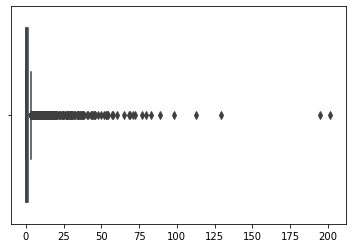

In [144]:
sns.boxplot(reg_predict)

#### Gradient Boosting

In [146]:
gb = GradientBoostingRegressor(random_state=42)

In [147]:
gb.fit(X_train,y_train)

GradientBoostingRegressor(random_state=42)

In [149]:
gb_predict = gb.predict(X_test)

In [150]:
gb_predict

array([ 0.02242292, -0.01680662, -0.02201891, ...,  0.32247215,
       -0.02453552, -0.02388993])

In [151]:
gb_predict[gb_predict < 0 ] = 0

In [152]:
gb_predict

array([0.02242292, 0.        , 0.        , ..., 0.32247215, 0.        ,
       0.        ])

In [153]:
resultados = pd.DataFrame()
resultados['revenue'] = y_test
resultados['predict'] = gb_predict
resultados['erro'] = gb_predict - y_test

In [154]:
resultados[resultados.revenue > 0]

,revenue,predict,erro
3006,32.49,45.423628,12.933628
5928,74.85,0.000000,-74.850000
8361,424.50,35.721105,-388.778895
8612,55.99,21.136136,-34.853864
416,15.19,17.679543,2.489543
4077,5.97,9.928129,3.958129
8146,27.19,26.180193,-1.009807
4908,372.65,47.853577,-324.796423
9395,29.98,16.881575,-13.098425
8728,101.95,176.065289,74.115289


In [155]:
# previsão que cada cliente que acessa o site gastará
np.sqrt(mean_squared_error(y_test,gb_predict))

23.10004349029805

# Salvando o modelo

In [ ]:


pickle.dump(gb, open('C:\Estudos\Materiais\Cursos\FIAP\MBA-DS\Fase_3_Data_Capture\Solution_Sprint_MOD_3\Scripts\Petz_Google_Analytics/Petz_Google_Analytics.pkl', 'wb'))

In [158]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Grupo J - 1DTSO" --iversion

Author: Grupo J - 1DTSO

numpy  : 1.23.4
json   : 2.0.9
pandas : 1.5.0
seaborn: 0.11.2

